# Two-level system tutorial

## Import

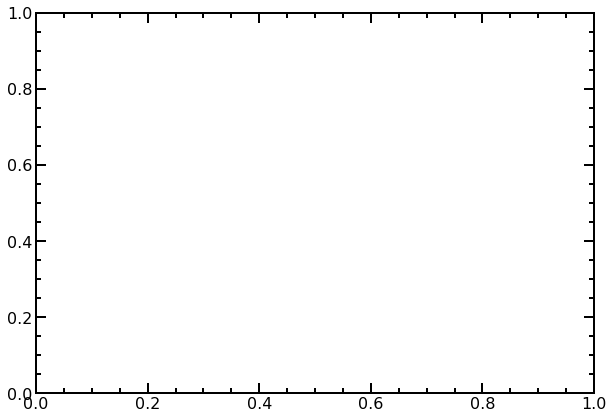

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
import plotting_settings
import scipy.linalg

## Bloch sphere

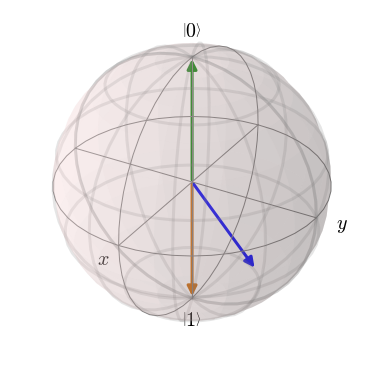

In [132]:
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
b = Bloch()
b.add_states([psi0,psi1,psi])
b.make_sphere()

## Driving two-level system
Here, we define the two-level system via the Hamiltonian $$H=\frac{1}{2}\omega_a\sigma_Z$$ and the driving term 
$$H_d= g\cos(\omega_d t)\sigma_X$$
We can either solve the Schrodinger equation directly or use RWA to get the Hamiltonian in the rotating frame.

First, we simulate the system in the lab frame. Note the fast oscillation which is due to fast rotation in the lab frame around Z.

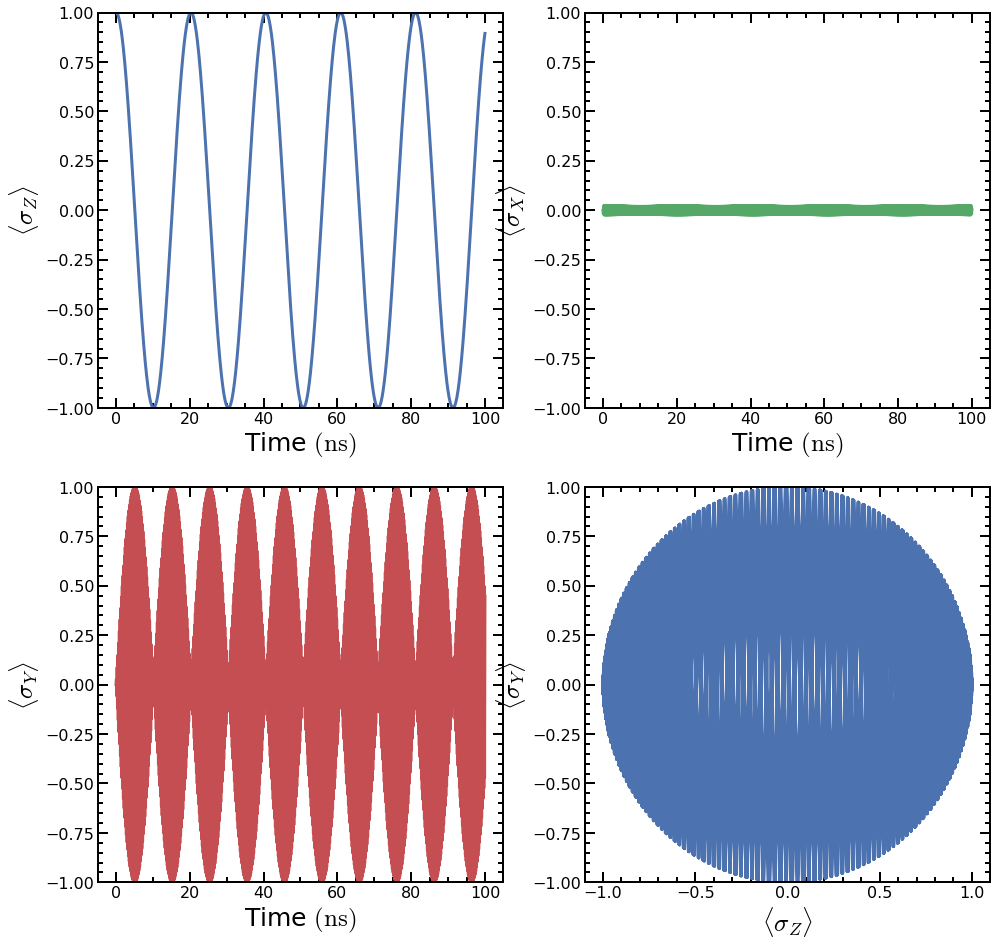

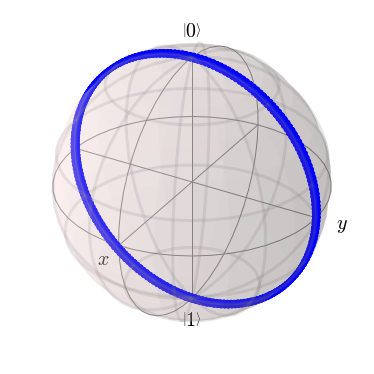

In [133]:
atom_freq = 5 #GHz
drive_freq = 5 #GHz
coupl_const = 0.05 #GHz
H0 = 2*np.pi*0.5*atom_freq*sigmaz()
H1 = 2*np.pi*coupl_const*sigmax()
tlist = np.linspace(0,int(100),1001) #ns
def time_dependent_term(t, **kargs):
    nu_d = kargs['omega_d']
    two_pi_t = 2 * np.pi * t
    return np.cos(nu_d * two_pi_t)
H = [H0,[H1, time_dependent_term(t=tlist, omega_d = drive_freq)]]
output = mesolve(H, rho0=basis(2,0), tlist=tlist, c_ops=[], e_ops=[])
sz = np.real(expect(sigmaz(),output.states))
sx = np.real(expect(sigmax(),output.states))
sy = np.real(expect(sigmay(),output.states))
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx, color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy, color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy)
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx, sy, sz], meth ='s')
b.make_sphere()

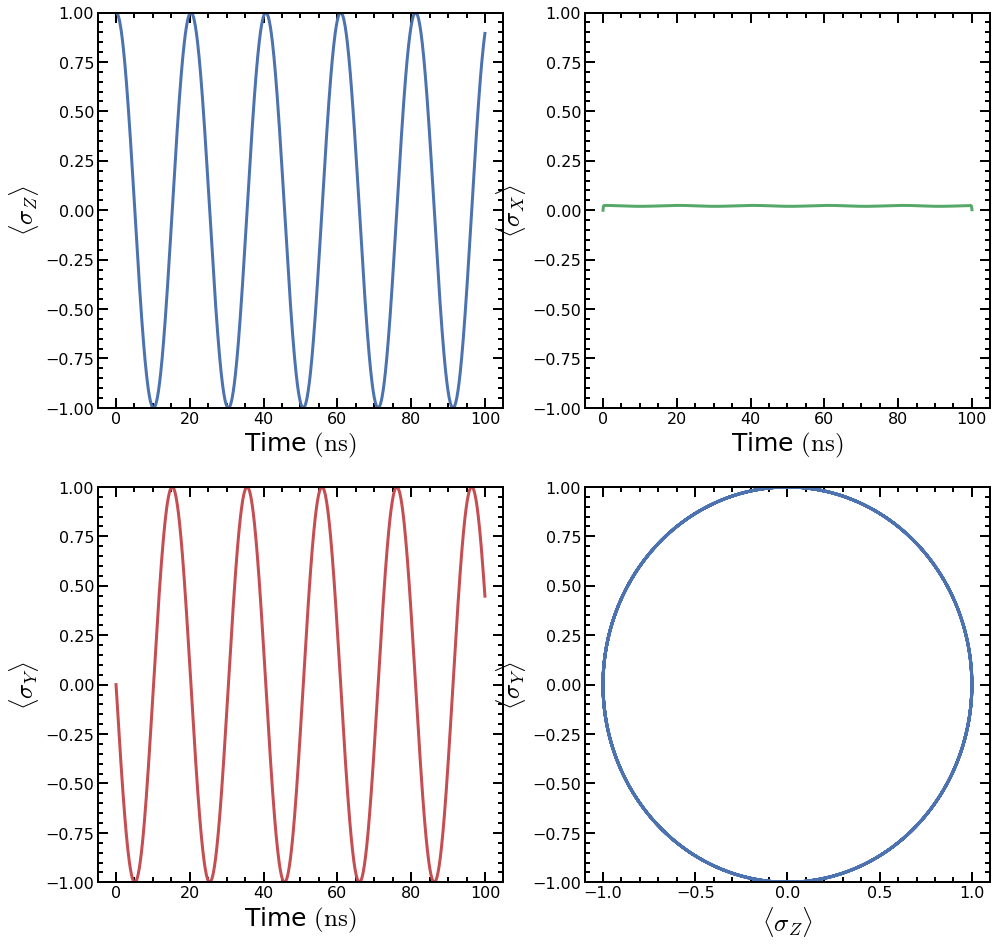

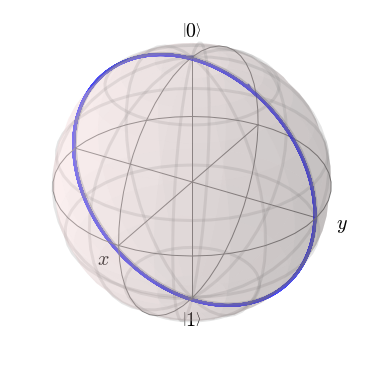

In [134]:
# Transform back to the rotating frame
sz = np.real(expect(sigmaz(),output.states))
sx = np.real(expect(sigmax(),output.states))
sy = np.real(expect(sigmay(),output.states))
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx*np.cos(2*np.pi*drive_freq*tlist), color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy*np.cos(2*np.pi*drive_freq*tlist), color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy*np.cos(2*np.pi*drive_freq*tlist))
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx*np.cos(2*np.pi*drive_freq*tlist), sy*np.cos(2*np.pi*drive_freq*tlist), sz], meth ='l')
b.make_sphere()

### Using RWA

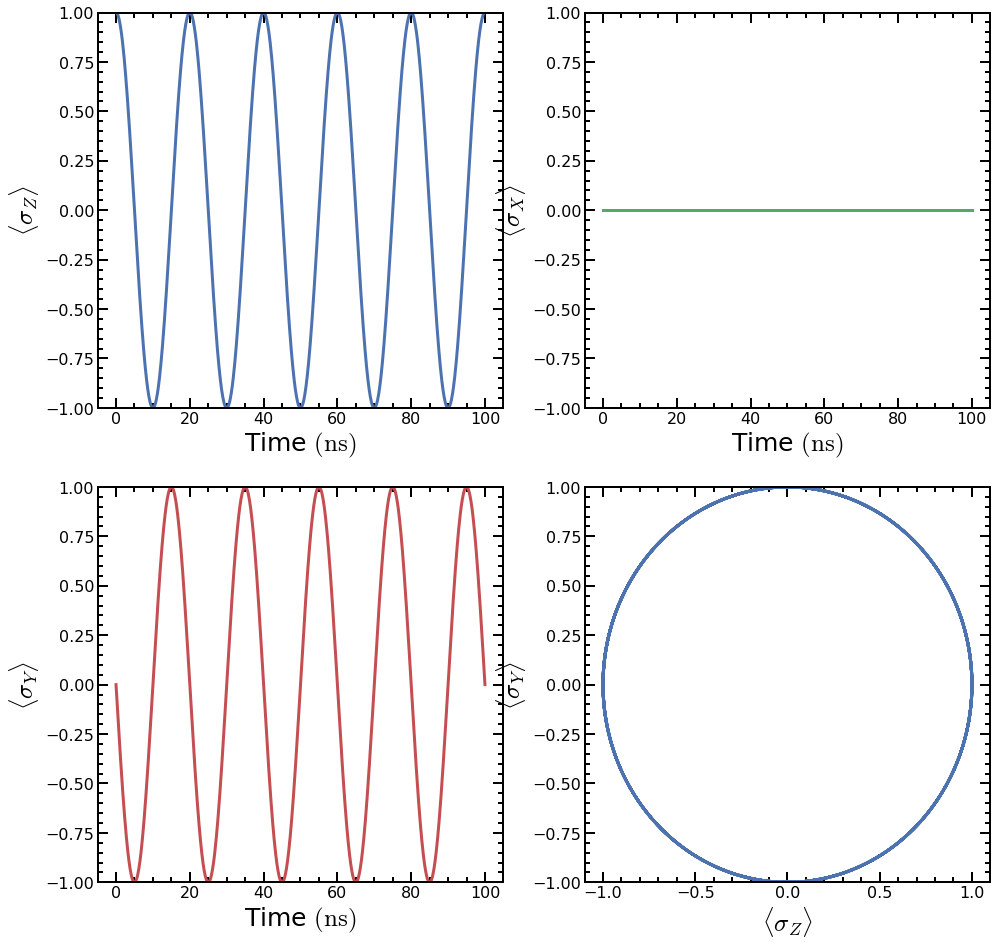

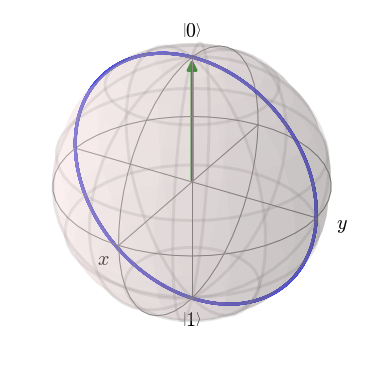

In [135]:
#Using RWA
atom_freq = 5 #GHz
drive_freq = 5 #GHz
coupl_const = 0.05 #GHz
# psi_ini = basis(2,0) - 1j*basis(2,1)
psi_ini = basis(2,0)
psi_ini = psi_ini.unit()
H = 2*np.pi*0.5*(atom_freq-drive_freq)*sigmaz() + 2*np.pi*0.5*coupl_const*sigmax()
output = mesolve(H, rho0=psi_ini,tlist = tlist, c_ops=[], e_ops=[sigmax(), sigmay(),sigmaz()])
sx, sy, sz = output.expect[:]
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx, color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy, color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy)
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx, sy, sz], meth='l')
b.add_states(psi_ini)
b.make_sphere()

### Pulse shape
Above we assume a constant drive. Here, we assume that the drive can be shaped by using a modulated pulse. We can redefine the drive Hamiltonian as a product of the pulse and the carrier tone. We use the pulse shapes functions developed by Konstantin Nesterov.

In [3]:
atom_freq = 0.5 #GHz
drive_freq = 0.5 #GHz
coupl_const = 1 #normalized, 1 = 2pi pulse
H0 = 0.5*atom_freq*sigmaz()
H1 = coupl_const*sigmax()
sigma = 0.25

T_start = 0
T_gate = 20
shape = 'gauss'
drag = False
drag_coeff = 0.1
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=drive_freq)

0.9996046559042723


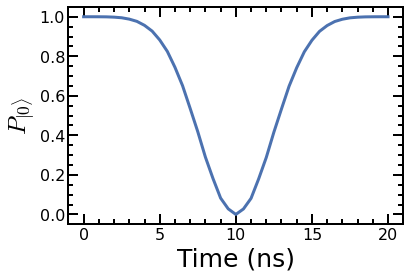

In [4]:
ini_state = basis(2,0)
fin_state = basis(2,0)
trans_prob = gates.prob_transition(U_t, ini_state, fin_state)
plt.plot(t_points, trans_prob)
plt.xlabel('Time (ns)')
plt.ylabel(r'$P_{|0\rangle}$')
U_ideal = qeye(2)
U_real = U_t[-1]
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
print(fidelity)

### Three level system

99.85026650789123


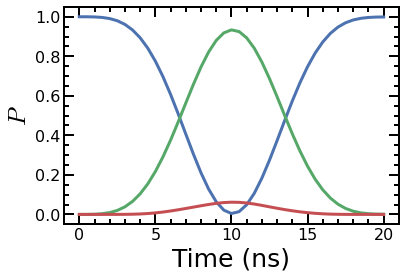

In [207]:
#Now look at three level system
wa = 5
anharmonicity = -0.2
w0 = 0
w1 = wa
w2 = 2*wa+anharmonicity
p1 = basis(3,1)*basis(3,1).dag()
p2 = basis(3,2)*basis(3,2).dag()
H0 = w1*p1 + w2*p2
a = destroy(3)
wd = wa
coupl_const = 1 #normalized to 2pi pulse
H1 = coupl_const*(a+a.dag())

T_start = 0
T_gate = 20
shape = 'gauss'
drag = True
drag_coeff = 0.5
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=wd)

ini_state = basis(3,0)
trans_prob_0 = gates.prob_transition(U_t, ini_state, basis(3,0))
trans_prob_1 = gates.prob_transition(U_t, ini_state, basis(3,1))
trans_prob_2 = gates.prob_transition(U_t, ini_state, basis(3,2))
plt.plot(t_points, trans_prob_0)
plt.plot(t_points, trans_prob_1)
plt.plot(t_points, trans_prob_2)
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

#Truncated to lowest 2 levels
P = basis(3,0)*basis(3,0).dag() + basis(3,1)*basis(3,1).dag()
U_real = P*U_t[-1]*P
U_ideal = P*qeye(3)*P
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
print(fidelity*100)

# Coupled system

Text(0, 0.5, 'Transition freq')

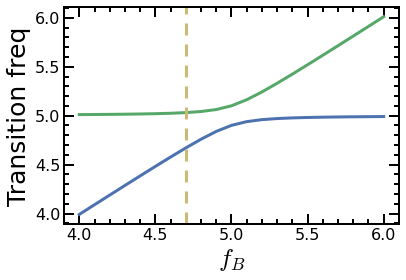

In [143]:
ZI = tensor(sigmaz(),qeye(2))
XI = tensor(sigmax(),qeye(2))
YI = tensor(sigmay(),qeye(2))
IZ = tensor(qeye(2), sigmaz())
IX = tensor(qeye(2), sigmax())
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())
def coupled_tls_hamiltonian(wa,wb,g):
    return wa*ZI/2 + wb*IZ/2 + g*IX*XI

freq_a = 5
freq_b = np.linspace(4,6,21)
coupling = 0.1
energies = np.zeros((len(freq_b), 4))
for idx, wb in enumerate(freq_b):
    energies[idx,:] = coupled_tls_hamiltonian(freq_a,wb,coupling).eigenenergies()
for idy in range(1,3):
    plt.plot(freq_b, energies[:,idy]-energies[:,0])
plt.axvline(x=4.7, color='C4', linestyle='--')
plt.xlabel(r'$f_B$')
plt.ylabel('Transition freq')

Text(0, 0.5, '$\\delta f_{00-10}$')

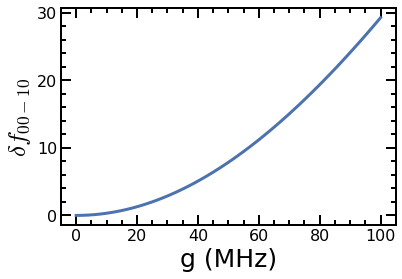

In [144]:
freq_a = 5
freq_b = 4.7
coupling = np.linspace(0,0.1)
energies = np.zeros((len(coupling), 4))
for idx, g in enumerate(coupling):
    energies[idx,:] = coupled_tls_hamiltonian(freq_a,freq_b,g).eigenenergies()
trans_freq = energies[:,1]   - energies[:,0]
trans_freq = abs(trans_freq - np.max(trans_freq))
plt.plot(coupling*1e3, trans_freq*1e3)
plt.xlabel('g (MHz)')
plt.ylabel(r'$\delta f_{00-10}$')

## Cross resonance dynamics

Text(0, 0.5, '$P$')

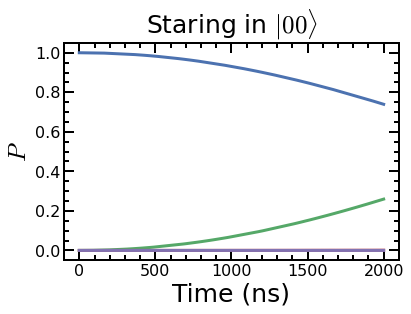

In [191]:
freq_a = 5 
freq_b = 4.7 
g = 0.02 
coupl_const = 1

# A: 00-10, 01-11, B: 00-01, 10-11 
H0 = 0.5*(freq_a*ZI+freq_b*IZ) + g*XX
eig_energies = H0.eigenenergies()
drive_freq = eig_energies[1]-eig_energies[0] #qubit b
H1 = coupl_const*(XI+0.1*IX)

T_start = 0
T_gate = 2000
shape = 'square'
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=drive_freq)

state_00 = tensor(basis(2,0),basis(2,0))
state_01 = tensor(basis(2,0),basis(2,1))
state_10 = tensor(basis(2,1),basis(2,0))
state_11 = tensor(basis(2,1),basis(2,1))

trans_prob_00_00 = gates.prob_transition(U_t, state_00, state_00)
trans_prob_00_01 = gates.prob_transition(U_t, state_00, state_01)
trans_prob_00_10 = gates.prob_transition(U_t, state_00, state_10)
trans_prob_00_11 = gates.prob_transition(U_t, state_00, state_11)

plt.plot(t_points, trans_prob_00_00)
plt.plot(t_points, trans_prob_00_01)
plt.plot(t_points, trans_prob_00_10)
plt.plot(t_points, trans_prob_00_11)
plt.title(r'Staring in $|00\rangle$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

Text(0, 0.5, '$P$')

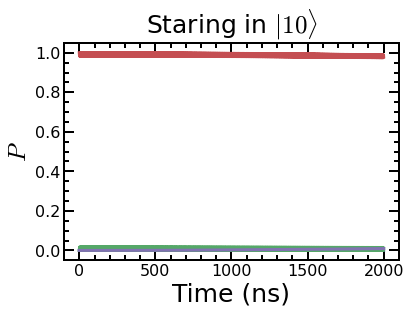

In [192]:
trans_prob_10_00 = gates.prob_transition(U_t, state_10, state_00)
trans_prob_10_01 = gates.prob_transition(U_t, state_10, state_01)
trans_prob_10_10 = gates.prob_transition(U_t, state_10, state_10)
trans_prob_10_11 = gates.prob_transition(U_t, state_10, state_11)
plt.plot(t_points, trans_prob_10_00)
plt.plot(t_points, trans_prob_10_01)
plt.plot(t_points, trans_prob_10_10)
plt.plot(t_points, trans_prob_10_11)
plt.title(r'Staring in $|10\rangle$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

In [ ]:
# P = basis(3,0)*basis(3,0).dag() + basis(3,1)*basis(3,1).dag()
# U_real = P*U_t[-1]*P
# U_ideal = P*qeye(3)*P
# op1 = U_real.dag() * U_real
# op2 = U_real * U_ideal.dag()
# fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
# print(fidelity*100)